# Determining at which age a person is most likely to commit sucide.

### Importing the relevent libraries

In [1340]:
pip install xgboost  # package installed.

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [1341]:
import numpy as np  # Allows us to work with arrays.
import matplotlib.pyplot as plt  # Allows working with plots.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.
from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.
import seaborn as sns  # Allows to polt beautiful plots.
import matplotlib.pyplot as plt # plotting.
from sklearn.model_selection import train_test_split  # Splits dataset into test set and traning set. 
from sklearn.preprocessing import StandardScaler  # Perform the feature scaling.
from sklearn.linear_model import LogisticRegression  # Performs logistic regression.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # creates a confusion matrix
from sklearn.metrics import accuracy_score  # Returns accury score of a model.
from sklearn.neighbors import KNeighborsClassifier  # performs K Neariesst Neighobour.
from sklearn.svm import SVC  # Performs svm
from sklearn.naive_bayes import GaussianNB  # performs naive_bayes gaussianNB.
from sklearn.tree import DecisionTreeClassifier  #Perfroms decision tree classification model.
from sklearn.ensemble import RandomForestClassifier  #Performs random forest classification.
from xgboost import XGBClassifier  # performs xgboost classification. gradiant decision trees.
from sklearn.decomposition import PCA  # Performs model optimization
from sklearn.decomposition import KernelPCA  # Performs model optimization
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # performs model optimization
from sklearn.model_selection import cross_val_score  # performs cross validation. Helps in model selection.
from sklearn.model_selection import GridSearchCV  # helps select the best hyper parameters

### Importing the dataframe

In [1342]:
sucidedataframe = pd.read_csv("who_suicide_statistics.csv")  # opens csv files and assighns them to a variable.

<AxesSubplot:>

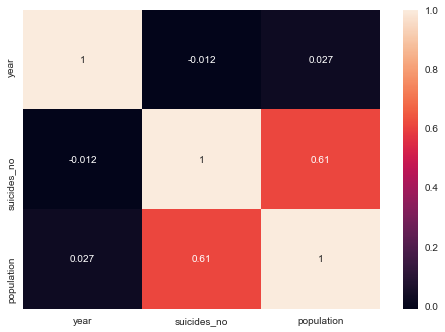

In [1343]:
matrix = sucidedataframe.corr().round(26)
sns.heatmap(data=matrix,annot=True)

### Checking the data from the dataframe before pre-processing

In [1344]:
sucidedataframe.head(1)  # Taking a look at the dataframe the first elements of the dataset.

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0


In [1345]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


## 1. Data pre-processing

In [1]:
sucidedataframe.columns  # The columns of the dataframe are viewed.

NameError: name 'sucidedataframe' is not defined

In [1347]:
# Below relevent data is selected that will be used in this project.
sucidedataframe = sucidedataframe[["age", "sex", "population", "suicides_no", "suicides_no"]]
sucidedataframe.head(1)  # Taking a look at the dataframe to see if the needed changes have been made.

,age,sex,population,suicides_no,suicides_no
0,15-24 years,female,277900.0,NaN,NaN


In [1348]:
# Below the col names are renamed.
sucidedataframe = sucidedataframe.set_axis(["Age", "Gender", "Population", "Suicide_Committed_num", "Suicide_Committed"],axis=1)
sucidedataframe.head(1)  # Taking a look at the dataframe to see if the needed changes have been made.

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
0,15-24 years,female,277900.0,NaN,NaN


In [1349]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

(43776, 5)

### Dealing with null values

In [1350]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

Age                         0
Gender                      0
Population               5460
Suicide_Committed_num    2256
Suicide_Committed        2256
dtype: int64

In [1351]:
print('The age range 5-14 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '5-14 years'])) + ' times.')
print('The age range 15-24 years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '15-24 years'])) + ' times.')
print('The age range 25-34 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '25-34 years'])) + ' times.')
print('The age range 35-54 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '35-54 years'])) + ' times.')
print('The age range 55-74 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '55-74 years'])) + ' times.')
print('The age range 75+ years years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '75+ years'])) + ' times.')

The age range 5-14 years years years appears 7296 times.
The age range 15-24 years appears 7296 times.
The age range 25-34 years years appears 7296 times.
The age range 35-54 years years appears 7296 times.
The age range 55-74 years years years appears 7296 times.
The age range 75+ years years years years appears 7296 times.


In [1352]:
sucidedataframe = sucidedataframe.dropna() # droping all rows with at least one null values.

In [1353]:
print('The age range 5-14 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '5-14 years'])) + ' times.')
print('The age range 15-24 years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '15-24 years'])) + ' times.')
print('The age range 25-34 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '25-34 years'])) + ' times.')
print('The age range 35-54 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '35-54 years'])) + ' times.')
print('The age range 55-74 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '55-74 years'])) + ' times.')
print('The age range 75+ years years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '75+ years'])) + ' times.')

The age range 5-14 years years years appears 6010 times.
The age range 15-24 years appears 6010 times.
The age range 25-34 years years appears 6010 times.
The age range 35-54 years years appears 6010 times.
The age range 55-74 years years years appears 6010 times.
The age range 75+ years years years years appears 6010 times.


In [1354]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

(36060, 5)

In [1355]:
sucidedataframe.describe().round()  # Shows the count, mean, std, min, 25%, 50%, 75% and 
                                    # max of a datframe. Could be useful for feature scaling afterwords.

,Population,Suicide_Committed_num,Suicide_Committed
count,36060.0,36060.0,36060.0
mean,1699996.0,222.0,222.0
std,3697811.0,855.0,855.0
min,259.0,0.0,0.0
25%,80566.0,2.0,2.0
50%,375765.0,21.0,21.0
75%,1344900.0,116.0,116.0
max,43805214.0,22338.0,22338.0


In [1356]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36060 entries, 24 to 43763
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    36060 non-null  object 
 1   Gender                 36060 non-null  object 
 2   Population             36060 non-null  float64
 3   Suicide_Committed_num  36060 non-null  float64
 4   Suicide_Committed      36060 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.7+ MB


In [1357]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

Age                      0
Gender                   0
Population               0
Suicide_Committed_num    0
Suicide_Committed        0
dtype: int64

In [1358]:
print(sucidedataframe.pivot_table(columns=['Suicide_Committed'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicide_Committed
0.0        5936
1.0        2146
2.0        1489
3.0        1129
4.0         907
           ... 
20705.0       1
21063.0       1
21262.0       1
21706.0       1
22338.0       1
Length: 2231, dtype: int64


### initial plot to visulize the data before working on it.

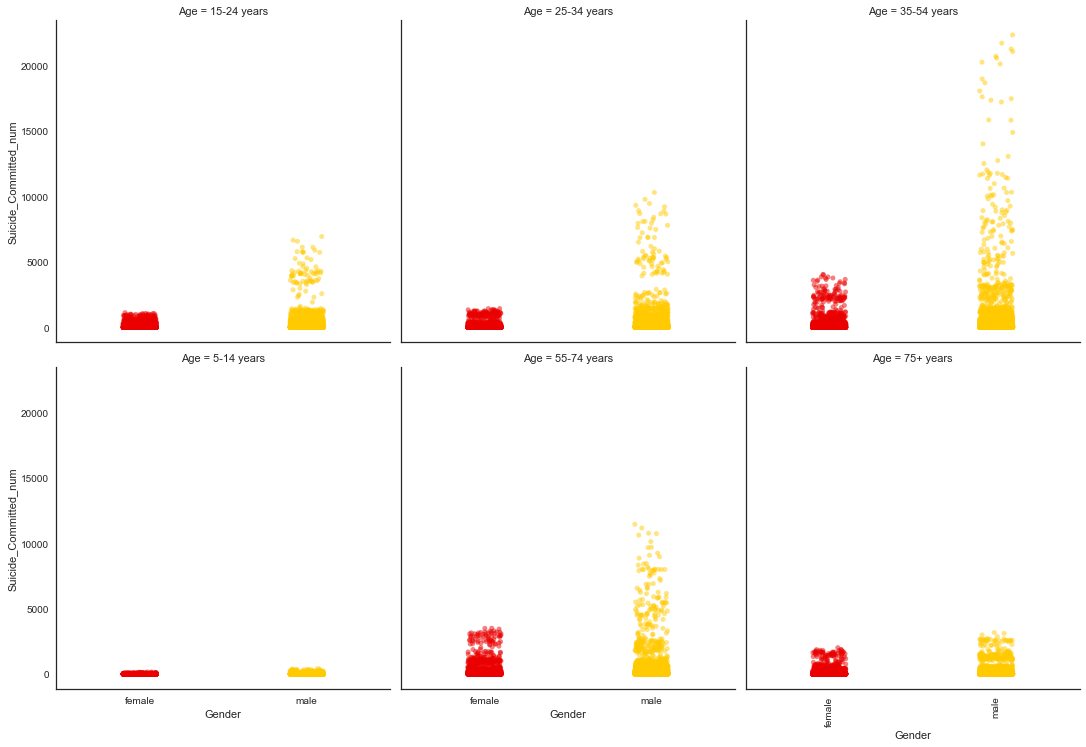

In [1359]:
plt.rcParams['figure.figsize'] = (13, 7)
plt.style.use('seaborn-white')
sns.catplot(x='Gender', y="Suicide_Committed_num", col="Age", col_wrap=3, sharey=True, data=sucidedataframe, alpha=0.5, palette = 'hot')
plt.xticks(rotation = 90)
plt.show()

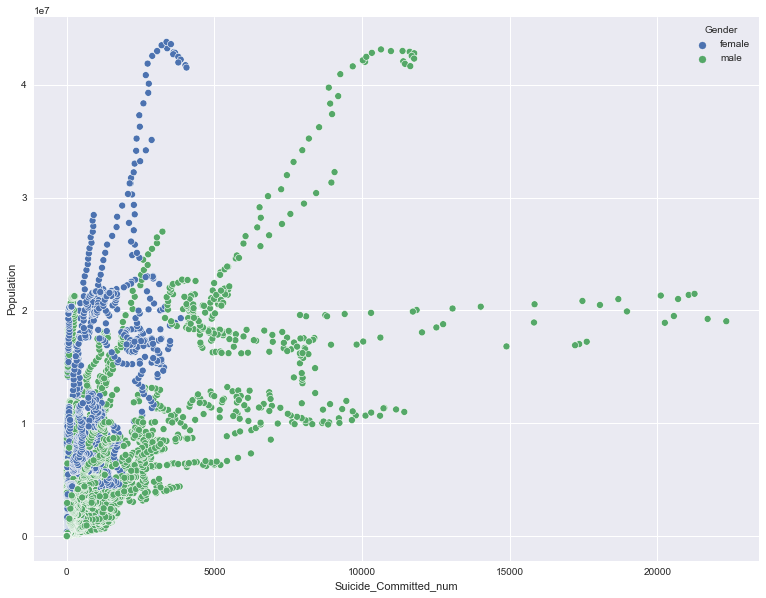

In [1360]:
plt.style.use('seaborn')
plt.figure(figsize= (13,10))
sns.scatterplot(x= 'Population', y= 'Suicide_Committed_num', data = sucidedataframe, hue = 'Gender')
plt.show()

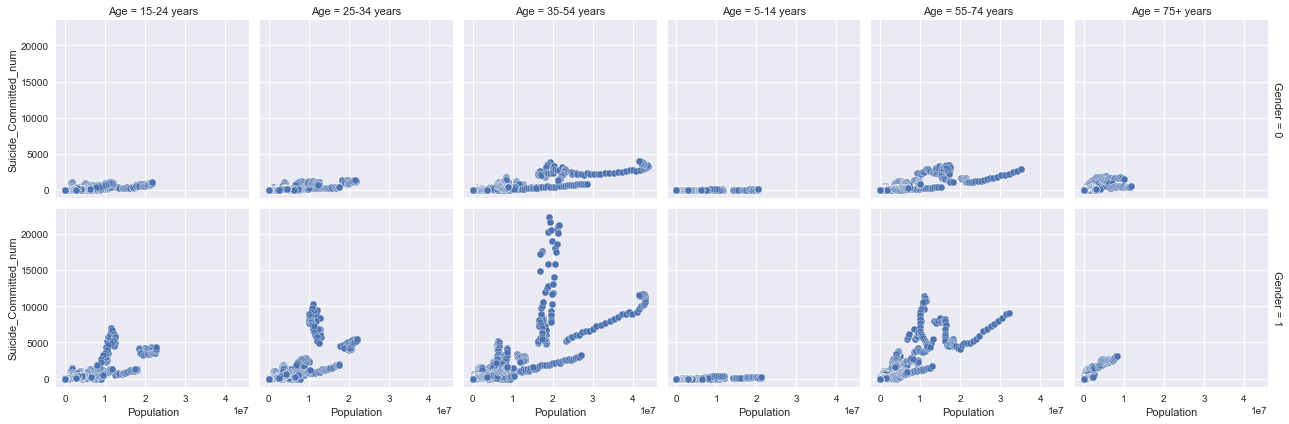

In [1401]:
My_plot_object = sns.FacetGrid(sucidedataframe , row = 'Gender',col = 'Age',margin_titles=True)
My_plot_object.map(plt.scatter,'Population', "Suicide_Committed_num",edgecolor = 'w')
plt.show()

### Encoding variables to  0 and 1

In [1362]:
le = LabelEncoder()
sucidedataframe.Gender = le.fit_transform(sucidedataframe.Gender)

In [1363]:
sucidedataframe.head()

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
24,15-24 years,0,289700.0,14.0,14.0
25,25-34 years,0,257200.0,4.0,4.0
26,35-54 years,0,278800.0,6.0,6.0
27,5-14 years,0,311000.0,0.0,0.0
28,55-74 years,0,144600.0,0.0,0.0


In [1364]:
print(sucidedataframe.pivot_table(columns=['Suicide_Committed'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicide_Committed
0.0        5936
1.0        2146
2.0        1489
3.0        1129
4.0         907
           ... 
20705.0       1
21063.0       1
21262.0       1
21706.0       1
22338.0       1
Length: 2231, dtype: int64


In [1365]:
sucidedataframe.loc[sucidedataframe.Suicide_Committed > 0, "Suicide_Committed"] = 1  # Encoding everthig above 0 to 1.

In [1366]:
print(sucidedataframe.pivot_table(columns=['Suicide_Committed'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicide_Committed
0.0     5936
1.0    30124
dtype: int64


In [1367]:
sucidedataframe['Suicide_Committed'] = sucidedataframe['Suicide_Committed'].astype(np.int64)  # converting float to int.

In [1368]:
print(sucidedataframe.pivot_table(columns=['Suicide_Committed'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicide_Committed
0     5936
1    30124
dtype: int64


### selecting X and Y values 

In [1369]:
X = sucidedataframe.iloc[:, 0:3].values  # selecting the values for the X variable.

In [1370]:
Y = sucidedataframe[["Suicide_Committed"]].to_numpy()  # selecting the values for the Y variable. # done using .to_numpy and not 
                                                       # .iloc as .to_numpy creates a horizontal bar while .iloc creates a 
                                                       # horizontal bar which will not alighn with the x values.

In [1371]:
sucidedataframe.head(3)

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
24,15-24 years,0,289700.0,14.0,1
25,25-34 years,0,257200.0,4.0,1
26,35-54 years,0,278800.0,6.0,1


In [1372]:
sucidedataframe.head()  # Taking a look at the dataframe the first elements of the dataset.

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
24,15-24 years,0,289700.0,14.0,1
25,25-34 years,0,257200.0,4.0,1
26,35-54 years,0,278800.0,6.0,1
27,5-14 years,0,311000.0,0.0,0
28,55-74 years,0,144600.0,0.0,0


In [1373]:
sucidedataframe.head()  # Taking a look at the dataframe the first elements of the dataset.

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
24,15-24 years,0,289700.0,14.0,1
25,25-34 years,0,257200.0,4.0,1
26,35-54 years,0,278800.0,6.0,1
27,5-14 years,0,311000.0,0.0,0
28,55-74 years,0,144600.0,0.0,0


In [1374]:
# x = age , gender
# y = sucide comit

#x2 = age, population, suucide comit num 
#y2 = gender
print(X)  # Printing numpy array X.

[['15-24 years' 0 289700.0]
 ['25-34 years' 0 257200.0]
 ['35-54 years' 0 278800.0]
 ...
 ['5-14 years' 1 7291.0]
 ['55-74 years' 1 12615.0]
 ['75+ years' 1 2496.0]]


In [1375]:
print(Y)  # Printing numpy array Y.

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


### One Hot Encoding

In [1376]:
# count duplicates function learned from: https://datatofish.com/count-duplicates-pandas/
sucidedataframe.pivot_table(columns=['Age'], aggfunc='size')  # counts duplicates in the selected dataframe column.

Age
15-24 years    6010
25-34 years    6010
35-54 years    6010
5-14 years     6010
55-74 years    6010
75+ years      6010
dtype: int64

In [1377]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')    
# transformers= [('what to do', method , [index of column to apply method on])]
# remainder='what to do with the remaining columns'

X = np.array(ct.fit_transform(X))  # applies the above method on the given array.

In [1378]:
print(X)  # Printing numpy array X.

[[1.0 0.0 0.0 ... 0.0 0 289700.0]
 [0.0 1.0 0.0 ... 0.0 0 257200.0]
 [0.0 0.0 1.0 ... 0.0 0 278800.0]
 ...
 [0.0 0.0 0.0 ... 0.0 1 7291.0]
 [0.0 0.0 0.0 ... 0.0 1 12615.0]
 [0.0 0.0 0.0 ... 1.0 1 2496.0]]


In [1379]:
X = np.delete(X, -1, 1)  # delete second column of C

In [1380]:
print(X)  # Printing numpy array Y.

[[1.0 0.0 0.0 ... 0.0 0.0 0]
 [0.0 1.0 0.0 ... 0.0 0.0 0]
 [0.0 0.0 1.0 ... 0.0 0.0 0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 1]
 [0.0 0.0 0.0 ... 1.0 0.0 1]
 [0.0 0.0 0.0 ... 0.0 1.0 1]]


In [1381]:
sucidedataframe.head(2)  # Taking a look at the dataframe the first elements of the dataset.

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
24,15-24 years,0,289700.0,14.0,1
25,25-34 years,0,257200.0,4.0,1


### Selecting X2 and Y2 values

In [1382]:
X2 = sucidedataframe[["Age","Suicide_Committed_num" ,"Population"]].to_numpy()  # selecting the values for the X2 variable.

In [1383]:
Y2 = sucidedataframe[["Gender"]].to_numpy()  # selecting the values for the Y2 variable.

In [1384]:
print(X2)  # Printing numpy array X2.

[['15-24 years' 14.0 289700.0]
 ['25-34 years' 4.0 257200.0]
 ['35-54 years' 6.0 278800.0]
 ...
 ['5-14 years' 0.0 7291.0]
 ['55-74 years' 0.0 12615.0]
 ['75+ years' 0.0 2496.0]]


In [1385]:
print(Y2)  # Printing numpy array Y2.

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


### One Hot Encoding

In [1386]:
X2 = np.array(ct.fit_transform(X2))  # applies the above method on the given array.

In [1387]:
print(X2)  # Printing numpy array X2.

[[1.0 0.0 0.0 ... 0.0 14.0 289700.0]
 [0.0 1.0 0.0 ... 0.0 4.0 257200.0]
 [0.0 0.0 1.0 ... 0.0 6.0 278800.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 7291.0]
 [0.0 0.0 0.0 ... 0.0 0.0 12615.0]
 [0.0 0.0 0.0 ... 1.0 0.0 2496.0]]


In [1388]:
# %run MyOtherNotebook.ipynb use later to seprate code in note book. if allowed.

## Spliting the datasets into a training and test set 

In [1389]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 1)
# test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                            # to get the best results.                                                           
# random_state = 1         # resetting the  random seed

In [1390]:
# print the lenghth of both test and train set to see if there equally split.
print("The length of X_train is ",len(X_train), " and the length of Y_train is ", len(Y_train))  
print("The length of X_test is ",len(X_test), " and the length of Y_test is ", len(Y_test))

The length of X_train is  28848  and the length of Y_train is  28848
The length of X_test is  7212  and the length of Y_test is  7212


In [1391]:
# print the lenghth of both test and train set to see if there equally split.
print("The length of X2_train is ",len(X2_train), " and the length of Y2_train is ", len(Y2_train))
print("The length of X2_test is ",len(X2_test), " and the length of Y2_test is ", len(Y2_test))

The length of X2_train is  28848  and the length of Y2_train is  28848
The length of X2_test is  7212  and the length of Y2_test is  7212


In [1392]:
# print both test and train set to see them.
print("X_test ", X_test, "\nY_test ", Y_test, "\nX_train ", X_train, "\nY_train ", Y_train)

X_test  [[1.0 0.0 0.0 ... 0.0 0.0 1]
 [0.0 0.0 0.0 ... 0.0 1.0 1]
 [0.0 0.0 0.0 ... 1.0 0.0 1]
 ...
 [0.0 0.0 0.0 ... 1.0 0.0 1]
 [0.0 0.0 1.0 ... 0.0 0.0 0]
 [1.0 0.0 0.0 ... 0.0 0.0 0]] 
Y_test  [[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]] 
X_train  [[0.0 0.0 0.0 ... 1.0 0.0 0]
 [0.0 0.0 0.0 ... 0.0 0.0 1]
 [0.0 0.0 0.0 ... 1.0 0.0 1]
 ...
 [0.0 0.0 1.0 ... 0.0 0.0 1]
 [0.0 0.0 0.0 ... 1.0 0.0 0]
 [0.0 0.0 0.0 ... 0.0 0.0 0]] 
Y_train  [[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]


In [1393]:
# print both test and train set to see them.
print("X2_test ", X2_test, "\nY2_test ", Y2_test, "\nX2_train ", X2_train, "\nY2_train ", Y2_train)

X2_test  [[1.0 0.0 0.0 ... 0.0 6667.0 11714752.0]
 [0.0 0.0 0.0 ... 1.0 0.0 954.0]
 [0.0 0.0 0.0 ... 0.0 216.0 418200.0]
 ...
 [0.0 0.0 0.0 ... 0.0 217.0 1040500.0]
 [0.0 0.0 1.0 ... 0.0 1.0 94332.0]
 [1.0 0.0 0.0 ... 0.0 16.0 215400.0]] 
Y2_test  [[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]] 
X2_train  [[0.0 0.0 0.0 ... 0.0 4.0 142343.0]
 [0.0 0.0 0.0 ... 0.0 0.0 21500.0]
 [0.0 0.0 0.0 ... 0.0 295.0 2536730.0]
 ...
 [0.0 0.0 1.0 ... 0.0 1067.0 13704169.0]
 [0.0 0.0 0.0 ... 0.0 6.0 465100.0]
 [0.0 0.0 0.0 ... 0.0 2.0 403000.0]] 
Y2_train  [[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


## Feature Scaling 

In [1394]:
X2_train[0]  # checking element in the 0th index

array([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 4.0, 142343.0], dtype=object)

In [1395]:
sc = StandardScaler()  # creating an instance of the object.

X2_train[:, 6:] = sc.fit_transform(X2_train[:, 6:])  # Scaling x_train
X2_test[:, 6:] = sc.transform(X2_test[:, 6:])  # Scaling y_train

In [1396]:
print("X2_test ", X2_test,"\n\nX2_train ", X2_train)  # printing the sets after feature scaling.

X2_test  [[1.0 0.0 0.0 ... 0.0 7.446398944619078 2.6964860977419423]
 [0.0 0.0 0.0 ... 1.0 -0.25757297980246174 -0.45926455223718626]
 [0.0 0.0 0.0 ... 0.0 -0.007976769261730885 -0.3468565752769218]
 ...
 [0.0 0.0 0.0 ... 0.0 -0.006821231249968243 -0.1792061147275755]
 [0.0 0.0 1.0 ... 0.0 -0.2564174417906991 -0.4341080928041526]
 [1.0 0.0 0.0 ... 0.0 -0.23908437161425947 -0.40149182097739977]] 

X2_train  [[0.0 0.0 0.0 ... 0.0 -0.25295082775541117 -0.42117371025323713]
 [0.0 0.0 0.0 ... 0.0 -0.25757297980246174 -0.4537293660529554]
 [0.0 0.0 0.0 ... 0.0 0.0833107336675179 0.22388507696091625]
 ...
 [0.0 0.0 1.0 ... 0.0 0.9753860787482783 3.2324441184308363]
 [0.0 0.0 0.0 ... 0.0 -0.2506397517318859 -0.3342215011972748]
 [0.0 0.0 0.0 ... 0.0 -0.2552619037789365 -0.3509515246588117]]


# Applying PCA 

# Reduced accuracy so will not use

In [1199]:
#pca = PCA(n_components=2)

In [1200]:
#X2_train = pca.fit_transform(X2_train)
#X2_test = pca.fit_transform(X2_test)

# Applying Kernal PCA 

# Reduced accuracy so will not use

In [1201]:
#kpca = KernelPCA(n_components=2,kernel='rbf')

In [1202]:
#X2_train = kpca.fit_transform(X2_train)
#X2_test = kpca.fit_transform(X2_test)
 

# Applying LDA

In [1300]:
#lda = LDA(n_components=2)

In [1301]:
#X2_train = lda.fit_transform(X2_train, Y2_train)
#X2_test = lda.fit_transform(X2_test)

## Training Logistic regression model on traning sets.

## For X_train and Y_train 

In [890]:
logistic_regression_classifier = LogisticRegression()  # Building and object of the class.

In [891]:
logistic_regression_classifier.fit(X_train, Y_train)  # Building logistic regression model.

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

### predicting  result

In [892]:
Y_pred = logistic_regression_classifier.predict(X_test)  # Predicted results.
print("pred-real")  # printing predicted and real values.
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


### Confusion matrix

In [893]:
cm = confusion_matrix(Y_test, Y_pred)  # creating the confusion matrix
print("correct_0-incorrct_1\nincorrect_0-correct_1")  # printing correct and inccrocet results.
print(cm)  # prininting the confusion matrix.

correct_0-incorrct_1
incorrect_0-correct_1
[[   0 1219]
 [   0 5993]]


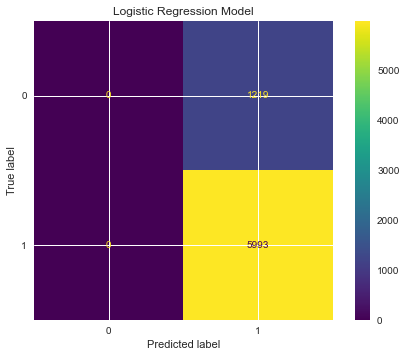

In [894]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  # creaing the confusion matrix plot.                           
disp.plot()  # displaying data in plot
plt.title("Logistic Regression Model")  # adding a title to plot
plt.show()  # showing the plot

### Getting accurcy of the model

In [895]:
Logistic_accuracy = round(accuracy_score(Y_test, Y_pred)*100, 2)  # saving the accurcy
round(accuracy_score(Y_test, Y_pred)*100, 2)  # showing the model accurecy rounded to 2 decimal places.

83.1

## k-Fold Cross Validation

In [1303]:
accuracies = cross_val_score(estimator = logistic_regression_classifier, X = X, y = Y, cv = 10)  # performs 10 different tests to get average accurecy.
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  # accuracy printed
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))  # standard deveation printed (std -avarage or std+ avarage )

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Accuracy: 83.54 %
Standard Deviation: 0.01 %


## For X2_train and Y2_train 

In [1212]:
logistic_regression_classifier.fit(X2_train, Y2_train)  # Building Logistic regression classification model.

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

### predicting result

In [1213]:
Y2_pred = logistic_regression_classifier.predict(X2_test)  # Predicted results.
print("pred-real")  # printing predicted and real values.
print(np.concatenate((Y2_pred.reshape(len(Y2_pred),1), Y2_test.reshape(len(Y2_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[1 1]
 [0 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [1 0]]


### Confusion matrix

In [1214]:
cm2 = confusion_matrix(Y2_test, Y2_pred)  # creating the confusion matrix
print("correct_0-incorrct_1\nincorrect_0-correct_1")  # printing correct and inccrocet results.
print(cm2)  # prininting the confusion matrix.

correct_0-incorrct_1
incorrect_0-correct_1
[[2611  982]
 [1573 2046]]


### Getting accurcy of the model

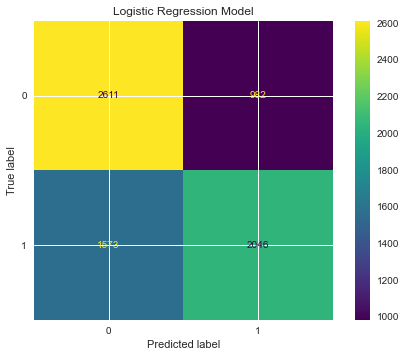

In [1215]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)  # creaing the confusion matrix plot.                           
disp.plot()  # displaying data in plot
plt.title("Logistic Regression Model")  # adding a title to plot
plt.show()  # showing the plot

In [1216]:
Logistic_accuracy2 = round(accuracy_score(Y2_test, Y2_pred)*100, 2)  #  Saving the accurcy
round(accuracy_score(Y2_test, Y2_pred)*100, 2)  # showing the model accurecy rounded to 2 decimal places.

64.57

## k-Fold Cross Validation

In [1217]:
accuracies = cross_val_score(estimator = logistic_regression_classifier, X = X2, y = Y2, cv = 10)  # performs 10 different tests to get average accurecy.
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  # accuracy printed
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))  # standard deveation printed (std -avarage or std+ avarage )

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Accuracy: 64.84 %
Standard Deviation: 0.99 %


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Training the K-NN  on the traning sets

## For X_train and Y_Train  

In [901]:
K_NN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)  # Bulding an object of the class

In [902]:
K_NN_classifier.fit(X_train, Y_train)  # Building the k-nearest neighbors classification model.

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

Text(0.5, 1.0, 'Test set')

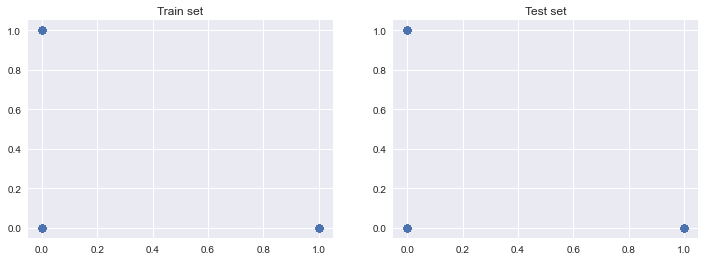

In [1328]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.scatter(X_train[:,:], X_train[:,:], cmap=Y_train, alpha=0.8)
plt.title('Train set')

plt.subplot(122)
plt.scatter(X_test[:,:], X_test[:,:], cmap=Y_test, alpha=0.8)
plt.title('Test set')

### predicting result

In [903]:
K_NN_Y_pred = K_NN_classifier.predict(X_test)  # Predicted results.
print("pred-real")  # printing predicted and real values.
print(np.concatenate((K_NN_Y_pred.reshape(len(K_NN_Y_pred),1), Y_test.reshape(len(Y_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


### Confusion matrix

In [904]:
K_NN_cm = confusion_matrix(Y_test, K_NN_Y_pred)  # creating the confusion matrix
print("correct_0-incorrct_1\nincorrect_0-correct_1")  # printing correct and inccrocet results.
print(K_NN_cm)  # prininting the confusion matrix.

correct_0-incorrct_1
incorrect_0-correct_1
[[   0 1219]
 [   0 5993]]


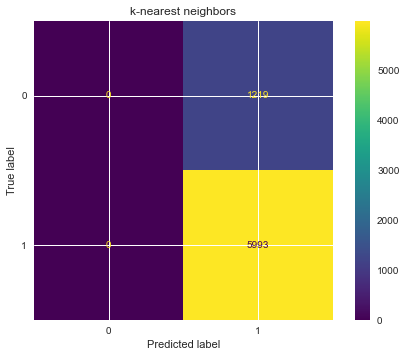

In [905]:
disp = ConfusionMatrixDisplay(confusion_matrix=K_NN_cm)  # creaing the confusion matrix plot.                           
disp.plot()  # displaying data in plot
plt.title("k-nearest neighbors")  # adding a title to plot
plt.show()  # showing the plot

### Getting accurcy of the model

In [906]:
K_NN_accuracy = round(accuracy_score(Y_test, K_NN_Y_pred)*100, 2) # saving the accurcy.
round(accuracy_score(Y_test, K_NN_Y_pred)*100, 2)  # showing the model accurecy rounded to 2 decimal places.

83.1

In [1326]:
K_list = range(1,30)
ave_scores = []
for k in K_list:
    model = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
    ave_scores.append (round (scores.mean (),3))
print(ave_scores)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0.677, 0.554, 0.698, 0.628, 0.724, 0.685, 0.723, 0.666, 0.717, 0.662, 0.683, 0.656, 0.68, 0.657, 0.677, 0.652, 0.686, 0.652, 0.655, 0.652, 0.655, 0.646, 0.662, 0.65, 0.688, 0.657, 0.665, 0.655, 0.691]


Text(0, 0.5, 'average cv model accuracy')

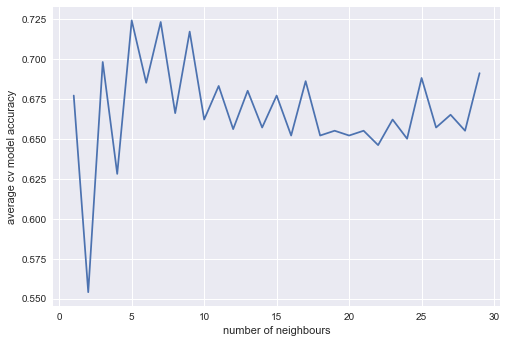

In [1327]:
plt.plot(K_list,ave_scores)
plt.xlabel("number of neighbours")
plt.ylabel("average cv model accuracy")

## k-Fold Cross Validation

In [1218]:
accuracies = cross_val_score(estimator = K_NN_classifier, X = X, y = Y, cv = 10)  # performs 10 different tests to get average accurecy.
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  # accuracy printed
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))  # standard deveation printed (std -avarage or std+ avarage )

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

Accuracy: 82.85 %
Standard Deviation: 2.39 %


## For X2_train and Y2_Train  

In [1220]:
K_NN_classifier.fit(X2_train, Y2_train)  # Building the k-nearest neighbors classification model.

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

### predicting result

In [1221]:
K_NN_Y2_pred = K_NN_classifier.predict(X2_test)  # Predicted results.
print("pred-real")  # printing predicted and real values.
print(np.concatenate((K_NN_Y2_pred.reshape(len(K_NN_Y2_pred),1), Y2_test.reshape(len(Y2_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[1 1]
 [1 1]
 [1 1]
 ...
 [0 1]
 [0 0]
 [0 0]]


### Confusion matrix

In [1222]:
K_NN_cm2 = confusion_matrix(Y2_test, K_NN_Y2_pred)  # creating the confusion matrix
print("correct_0-incorrct_1\nincorrect_0-correct_1")  # printing correct and inccrocet results.
print(K_NN_cm2)  # prininting the confusion matrix.

correct_0-incorrct_1
incorrect_0-correct_1
[[2941  652]
 [1055 2564]]


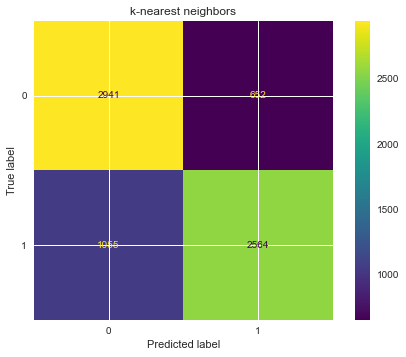

In [1223]:
disp = ConfusionMatrixDisplay(confusion_matrix=K_NN_cm2)  # creaing the confusion matrix plot.                           
disp.plot()  # displaying data in plot
plt.title("k-nearest neighbors")  # adding a title to plot
plt.show()  # showing the plot

### Getting accurcy of the model

In [1224]:
K_NN_accuracy2 = round(accuracy_score(Y2_test, K_NN_Y2_pred)*100, 2) # saving the accurcy.
round(accuracy_score(Y2_test, K_NN_Y2_pred)*100, 2)  # showing the model accurecy rounded to 2 decimal places.

76.33

## k-Fold Cross Validation

In [1219]:
accuracies = cross_val_score(estimator = K_NN_classifier, X = X, y = Y, cv = 10)  # performs 10 different tests to get average accurecy.
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  # accuracy printed
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))  # standard deveation printed (std -avarage or std+ avarage )

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

Accuracy: 76.05 %
Standard Deviation: 0.25 %


# Training the svm  on the traning sets

## For X_train and Y_Train  

In [1255]:
# set kernel to 'liner' or rbf as per requirement
svm_classifier = SVC(C = 0.25, kernel = 'linear', random_state = 0)  # creating an instance of the object.

## Applying Grid Search to find the best model and the best parameters

In [1247]:
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svm_classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)  # selecting all possible paramaters to go through to get the best model possible
grid_search.fit(X_train, Y_train)  # applying the search on our model.
best_accuracy = grid_search.best_score_  # the best accuracy 
best_parameters = grid_search.best_params_  # the best paramaters that gave the best accurecy
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))  # printing best accuracy
print("Best Parameters:", best_parameters)  # printing the best parameters

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best Accuracy: 83.65 %
Best Parameters: {'C': 0.25, 'kernel': 'linear'}


In [ ]:
#Best Accuracy: 83.65 %
#Best Parameters: {'C': 0.25, 'kernel': 'linear'}

In [1256]:
svm_classifier.fit(X_train, Y_train)  # Building svm model.

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=0.25, kernel='linear', random_state=0)

### predicting result

In [1257]:
svm_Y_pred = svm_classifier.predict(X_test)  # Predicted results.
print("pred-real")  # printing predicted and real values.
print(np.concatenate((svm_Y_pred.reshape(len(svm_Y_pred),1), Y_test.reshape(len(Y_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


### Confusion matrix

In [1258]:
svm_cm = confusion_matrix(Y_test, svm_Y_pred)  # creating the confusion matrix
print("correct_0-incorrct_1\nincorrect_0-correct_1")  # printing correct and inccrocet results.
print(svm_cm)  # prininting the confusion matrix.

correct_0-incorrct_1
incorrect_0-correct_1
[[   0 1219]
 [   0 5993]]


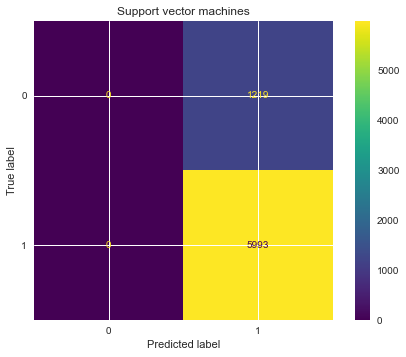

In [1259]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm)  # creaing the confusion matrix plot.                           
disp.plot()  # displaying data in plot
plt.title("Support vector machines")  # adding a title to plot
plt.show()  # showing the plot

### Getting accurcy of the model

In [1260]:
svm_accuracy = round(accuracy_score(Y_test, svm_Y_pred)*100, 2)  # getting model accurcy.
round(accuracy_score(Y_test, svm_Y_pred)*100, 2)  # showing the model accurecy rounded to 2 decimal places.

83.1

## k-Fold Cross Validation

In [1261]:
accuracies = cross_val_score(estimator = svm_classifier, X = X, y = Y, cv = 10) # performs 10 different tests to get average accurecy.
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  # accuracy printed
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))  # standard deveation printed (std -avarage or std+ avarage )

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Accuracy: 83.65 %
Standard Deviation: 0.01 %


## For X2_train and Y2_Train  

In [1262]:
svm_classifier = SVC(C = 1, gamma = 0.9, kernel = 'rbf', random_state = 0) 
svm_classifier.fit(X2_train, Y2_train)  # Building svm model.

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=1, gamma=0.9, random_state=0)

## Applying Grid Search to find the best model and the best parameters

In [1248]:
grid_search.fit(X2_train, Y2_train)  # applying the search on our model.
best_accuracy = grid_search.best_score_  # the best accuracy 
best_parameters = grid_search.best_params_  # the best paramaters that gave the best accurecy
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))  # printing best accuracy
print("Best Parameters:", best_parameters)  # printing the best parameters

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best Accuracy: 67.77 %
Best Parameters: {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}


In [ ]:
#Best Accuracy: 67.77 %
#Best Parameters: {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}

### predicting result

In [1263]:
svm_Y2_pred = svm_classifier.predict(X2_test)  # Predicted results.
print("pred-real")  # printing predicted and real values.
print(np.concatenate((svm_Y2_pred.reshape(len(svm_Y2_pred),1), Y2_test.reshape(len(Y2_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[1 1]
 [0 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


### Confusion matrix

In [1264]:
svm_cm2 = confusion_matrix(Y2_test, svm_Y2_pred)  # creating the confusion matrix
print("correct_0-incorrct_1\nincorrect_0-correct_1")  # printing correct and inccrocet results.
print(svm_cm2)  # prininting the confusion matrix.

correct_0-incorrct_1
incorrect_0-correct_1
[[3298  295]
 [1998 1621]]


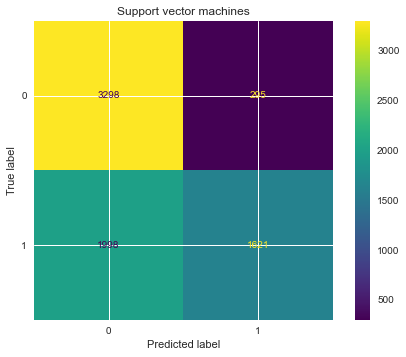

In [1265]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm2)  # creaing the confusion matrix plot.                           
disp.plot()  # displaying data in plot
plt.title("Support vector machines")  # adding a title to plot
plt.show()  # showing the plot

### Getting accurcy of the model

In [1266]:
svm_accuracy2 = round(accuracy_score(Y2_test, svm_Y2_pred)*100, 2)  # getting model accurcy.
round(accuracy_score(Y2_test, svm_Y2_pred)*100, 2)  # showing the model accurecy rounded to 2 decimal places.

68.21

## k-Fold Cross Validation

In [1314]:
accuracies = cross_val_score(estimator = svm_classifier, X = X2, y = Y2, cv = 10)   # performs 10 different tests to get average accurecy.
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  # accuracy printed
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))  # standard deveation printed (std -avarage or std+ avarage )

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Accuracy: 50.94 %
Standard Deviation: 0.50 %


# Training the naive_bayes  on the traning sets

## For X_train and Y_Train  

In [923]:
naive_bayes_classifier = GaussianNB()  # creating an instance of the object.

In [924]:
naive_bayes_classifier.fit(X_train, Y_train)  # Building naive_bayes model.

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

### predicting result

In [925]:
naive_bayes_Y_pred = naive_bayes_classifier.predict(X_test)  # Predicted results.
print("pred-real")  # printing predicted and real values.
print(np.concatenate((naive_bayes_Y_pred.reshape(len(naive_bayes_Y_pred),1), Y_test.reshape(len(Y_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


### Confusion matrix

In [926]:
naive_bayes_cm = confusion_matrix(Y_test, naive_bayes_Y_pred)  # creating the confusion matrix
print("correct_0-incorrct_1\nincorrect_0-correct_1")  # printing correct and inccrocet results.
print(naive_bayes_cm)  # prininting the confusion matrix.

correct_0-incorrct_1
incorrect_0-correct_1
[[ 457  762]
 [ 810 5183]]


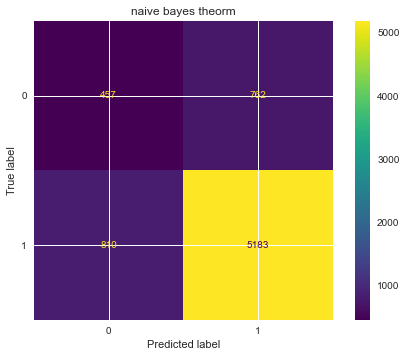

In [927]:
disp = ConfusionMatrixDisplay(confusion_matrix=naive_bayes_cm)  # creaing the confusion matrix plot.                           
disp.plot()  # displaying data in plot
plt.title("naive bayes theorm")  # adding a title to plot
plt.show()  # showing the plot

### Getting accurcy of the model

In [928]:
naive_bayes_accuracy = round(accuracy_score(Y_test, naive_bayes_Y_pred)*100, 2) # storing accurcy.
round(accuracy_score(Y_test, naive_bayes_Y_pred)*100, 2)  # showing the model accurecy rounded to 2 decimal places.

78.2

## k-Fold Cross Validation

In [1313]:
accuracies = cross_val_score(estimator = naive_bayes_classifier, X = X, y = Y, cv = 10)   # performs 10 different tests to get average accurecy.
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  # accuracy printed
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))  # standard deveation printed (std -avarage or std+ avarage )

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Accuracy: 78.00 %
Standard Deviation: 1.83 %


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## For X2_train and Y2_Train  

In [1120]:
naive_bayes_classifier.fit(X2_train, Y2_train)  # Building naive_bayes model.

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

### predicting result

In [1121]:
naive_bayes_Y2_pred = naive_bayes_classifier.predict(X2_test)  # Predicted results.
print("pred-real")  # printing predicted and real values.
print(np.concatenate((naive_bayes_Y2_pred.reshape(len(naive_bayes_Y2_pred),1), Y2_test.reshape(len(Y2_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[1 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 0]
 [0 0]]


### Confusion matrix

In [1122]:
naive_bayes_cm2 = confusion_matrix(Y2_test, naive_bayes_Y2_pred)  # creating the confusion matrix
print("correct_0-incorrct_1\nincorrect_0-correct_1")  # printing correct and inccrocet results.
print(naive_bayes_cm2)  # prininting the confusion matrix.

correct_0-incorrct_1
incorrect_0-correct_1
[[2468 1125]
 [2496 1123]]


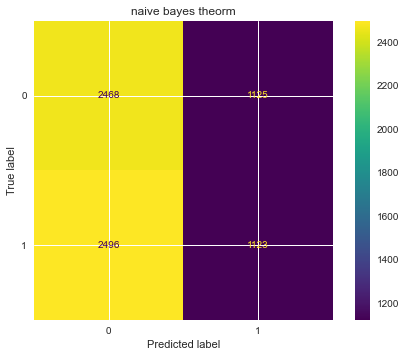

In [1123]:
disp = ConfusionMatrixDisplay(confusion_matrix=naive_bayes_cm2)  # creaing the confusion matrix plot.                           
disp.plot()  # displaying data in plot
plt.title("naive bayes theorm")  # adding a title to plot
plt.show()  # showing the plot

### Getting accurcy of the model

In [1124]:
naive_bayes_accuracy2 = round(accuracy_score(Y2_test, naive_bayes_Y2_pred)*100, 2)  # getting model accuracy. 
round(accuracy_score(Y2_test, naive_bayes_Y2_pred)*100, 2)  # showing the model accurecy rounded to 2 decimal places.

49.79

## k-Fold Cross Validation

In [1312]:
accuracies = cross_val_score(estimator = naive_bayes_classifier, X = X2, y = Y2, cv = 10)   # performs 10 different tests to get average accurecy.
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  # accuracy printed
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))  # standard deveation printed (std -avarage or std+ avarage )

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Accuracy: 53.31 %
Standard Deviation: 2.50 %


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Training the DecisionTree model on the traning sets

## For X_train and Y_Train  

In [934]:
DecisionTree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)  # creating an instance of the object.

In [935]:
DecisionTree_classifier.fit(X_train, Y_train)  # Building DecisionTree model.

DecisionTreeClassifier(criterion='entropy', random_state=0)

### predicting result

In [936]:
DecisionTree_Y_pred = DecisionTree_classifier.predict(X_test)  # Predicted results.
print("pred-real")  # printing predicted and real values.
print(np.concatenate((DecisionTree_Y_pred.reshape(len(DecisionTree_Y_pred),1), Y_test.reshape(len(Y_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


### Confusion matrix

In [937]:
DecisionTree_cm = confusion_matrix(Y_test, DecisionTree_Y_pred)  # creating the confusion matrix
print("correct_0-incorrct_1\nincorrect_0-correct_1")  # printing correct and inccrocet results.
print(DecisionTree_cm)  # prininting the confusion matrix.

correct_0-incorrct_1
incorrect_0-correct_1
[[   0 1219]
 [   0 5993]]


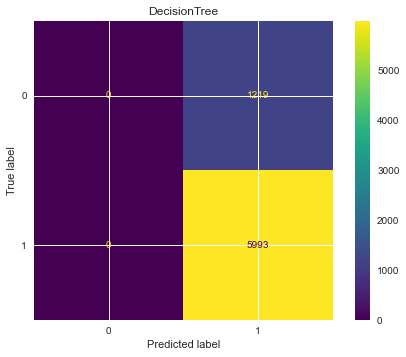

In [938]:
disp = ConfusionMatrixDisplay(confusion_matrix=DecisionTree_cm)  # creaing the confusion matrix plot.                           
disp.plot()  # displaying data in plot
plt.title("DecisionTree")  # adding a title to plot
plt.show()  # showing the plot

### Getting accurcy of the model

In [939]:
DecisionTree_accuracy = round(accuracy_score(Y_test, DecisionTree_Y_pred)*100, 2)  # storing accuracy.
round(accuracy_score(Y_test, DecisionTree_Y_pred)*100, 2)  # showing the model accurecy rounded to 2 decimal places.

83.1

## k-Fold Cross Validation

In [1237]:
accuracies = cross_val_score(estimator = DecisionTree_classifier, X = X, y = Y, cv = 10)   # performs 10 different tests to get average accurecy.
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  # accuracy printed
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))  # standard deveation printed (std -avarage or std+ avarage )

Accuracy: 83.65 %
Standard Deviation: 0.01 %


## For X2_train and Y2_Train  

In [1125]:
DecisionTree_classifier.fit(X2_train, Y2_train)  # Building DecisionTree model.

DecisionTreeClassifier(criterion='entropy', random_state=0)

### predicting result

In [1126]:
DecisionTree_Y2_pred = DecisionTree_classifier.predict(X2_test)  # Predicted results.
print("pred-real")  # printing predicted and real values.
print(np.concatenate((DecisionTree_Y2_pred.reshape(len(DecisionTree_Y2_pred),1), Y2_test.reshape(len(Y2_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[0 1]
 [1 1]
 [0 1]
 ...
 [1 1]
 [1 0]
 [1 0]]


### Confusion matrix

In [1127]:
DecisionTree_cm2 = confusion_matrix(Y2_test, DecisionTree_Y2_pred)  # creating the confusion matrix
print("correct_0-incorrct_1\nincorrect_0-correct_1")  # printing correct and inccrocet results.
print(DecisionTree_cm2)  # prininting the confusion matrix.

correct_0-incorrct_1
incorrect_0-correct_1
[[ 348 3245]
 [ 524 3095]]


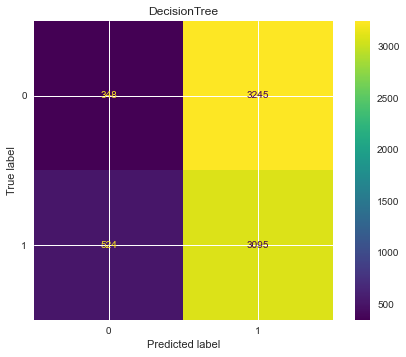

In [1128]:
disp = ConfusionMatrixDisplay(confusion_matrix=DecisionTree_cm2)  # creaing the confusion matrix plot.                           
disp.plot()  # displaying data in plot
plt.title("DecisionTree")  # adding a title to plot
plt.show()  # showing the plot

### Getting accurcy of the model

In [1129]:
DecisionTree_accuracy2 = round(accuracy_score(Y2_test, DecisionTree_Y2_pred)*100, 2) # storing accuray.
round(accuracy_score(Y2_test, DecisionTree_Y2_pred)*100, 2)  # showing the model accurecy rounded to 2 decimal places.

47.74

## k-Fold Cross Validation

In [1311]:
accuracies = cross_val_score(estimator = DecisionTree_classifier, X = X2, y = Y2, cv = 10)   # performs 10 different tests to get average accurecy.
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  # accuracy printed
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))  # standard deveation printed (std -avarage or std+ avarage )

Accuracy: 64.55 %
Standard Deviation: 2.38 %


# Training the randomforest model on the traning sets

## For X_train and Y_Train  

In [945]:
RandomForest_classifier = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state=0)  # creating an instance of the object.

In [946]:
RandomForest_classifier.fit(X_train, Y_train)  # Building RandomForest model.

<ipython-input-946-18e029da45e6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_classifier.fit(X_train, Y_train)  # Building RandomForest model.


RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

### predicting result

In [947]:
RandomForest_Y_pred = RandomForest_classifier.predict(X_test)  # Predicted results.
print("pred-real")  # printing predicted and real values.
print(np.concatenate((RandomForest_Y_pred.reshape(len(RandomForest_Y_pred),1), Y_test.reshape(len(Y_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


### Confusion matrix

In [948]:
RandomForest_cm = confusion_matrix(Y_test, RandomForest_Y_pred)  # creating the confusion matrix
print("correct_0-incorrct_1\nincorrect_0-correct_1")  # printing correct and inccrocet results.
print(DecisionTree_cm)  # prininting the confusion matrix.

correct_0-incorrct_1
incorrect_0-correct_1
[[   0 1219]
 [   0 5993]]


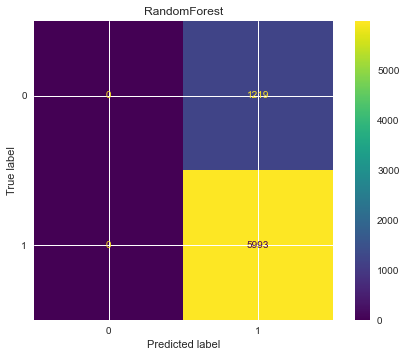

In [949]:
disp = ConfusionMatrixDisplay(confusion_matrix=RandomForest_cm)  # creaing the confusion matrix plot.                           
disp.plot()  # displaying data in plot
plt.title("RandomForest")  # adding a title to plot
plt.show()  # showing the plot

### Getting accurcy of the model

In [950]:
RandomForest_accuracy = round(accuracy_score(Y_test, RandomForest_Y_pred)*100, 2)  # storing accuracy.
round(accuracy_score(Y_test, RandomForest_Y_pred)*100, 2)  # showing the model accurecy rounded to 2 decimal places.

83.1

## k-Fold Cross Validation

In [1309]:
accuracies = cross_val_score(estimator = RandomForest_classifier, X = X, y = Y, cv = 10)   # performs 10 different tests to get average accurecy.
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  # accuracy printed
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))  # standard deveation printed (std -avarage or std+ avarage )

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was pa

Accuracy: 83.54 %
Standard Deviation: 0.01 %


## For X2_train and Y2_Train  

In [1130]:
RandomForest_classifier.fit(X2_train, Y2_train)  # Building RandomForest model.

<ipython-input-1130-1a8eab145cbc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_classifier.fit(X2_train, Y2_train)  # Building RandomForest model.


RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

### predicting result

In [1131]:
RandomForest_Y2_pred = RandomForest_classifier.predict(X2_test)  # Predicted results.
print("pred-real")  # printing predicted and real values.
print(np.concatenate((RandomForest_Y2_pred.reshape(len(RandomForest_Y2_pred),1), Y2_test.reshape(len(Y2_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[1 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [1 0]
 [1 0]]


### Confusion matrix

In [1132]:
RandomForest_cm2 = confusion_matrix(Y2_test, RandomForest_Y2_pred)  # creating the confusion matrix
print("correct_0-incorrct_1\nincorrect_0-correct_1")  # printing correct and inccrocet results.
print(RandomForest_cm2)  # prininting the confusion matrix.

correct_0-incorrct_1
incorrect_0-correct_1
[[ 568 3025]
 [ 808 2811]]


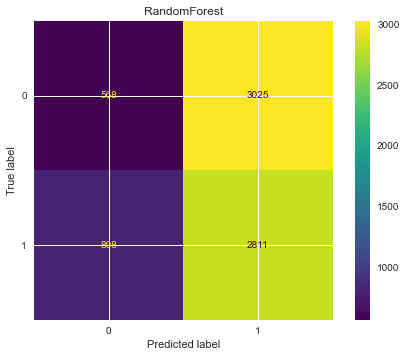

In [1133]:
disp = ConfusionMatrixDisplay(confusion_matrix=RandomForest_cm2)  # creaing the confusion matrix plot.                           
disp.plot()  # displaying data in plot
plt.title("RandomForest")  # adding a title to plot
plt.show()  # showing the plot

### Getting accurcy of the model

In [1134]:
RandomForest_accuracy2 = round(accuracy_score(Y2_test, RandomForest_Y2_pred)*100, 2)  # storing accuracy.
round(accuracy_score(Y2_test, RandomForest_Y2_pred)*100, 2)  # showing the model accurecy rounded to 2 decimal places.

46.85

## k-Fold Cross Validation

In [1307]:
accuracies = cross_val_score(estimator = RandomForest_classifier, X = X2, y = Y2, cv = 10)   # performs 10 different tests to get average accurecy.
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  # accuracy printed 
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))  # standard deveation printed (std -avarage or std+ avarage )

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was pa

Accuracy: 66.29 %
Standard Deviation: 3.11 %


## Training XGBoost on the Training sets

## For X_train and Y_Train  

In [1285]:
xgboost_classifier = XGBClassifier()
xgboost_classifier.fit(X_train, Y_train)

[09:15:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### predicting result

In [1287]:
xgboost_Y_pred = xgboost_classifier.predict(X_test)  # Predicted results.
print("pred-real")  # printing predicted and real values.
print(np.concatenate((xgboost_Y_pred.reshape(len(xgboost_Y_pred),1), Y_test.reshape(len(Y_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


### Confusion matrix

In [1288]:
xgboost_cm = confusion_matrix(Y_test, xgboost_Y_pred)  # creating the confusion matrix
print("correct_0-incorrct_1\nincorrect_0-correct_1")  # printing correct and inccrocet results.
print(xgboost_cm)  # prininting the confusion matrix.

correct_0-incorrct_1
incorrect_0-correct_1
[[   0 1219]
 [   0 5993]]


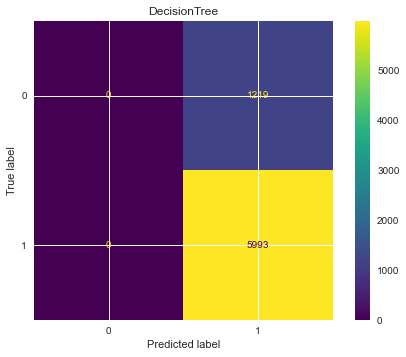

In [1289]:
disp = ConfusionMatrixDisplay(confusion_matrix=xgboost_cm)  # creaing the confusion matrix plot.                           
disp.plot()  # displaying data in plot
plt.title("DecisionTree")  # adding a title to plot
plt.show()  # showing the plot

### Getting accurcy of the model

In [1290]:
xgboost_accuracy = round(accuracy_score(Y_test, xgboost_Y_pred)*100, 2)  # storing accuracy.
round(accuracy_score(Y_test, xgboost_Y_pred)*100, 2)  # showing the model accurecy rounded to 2 decimal places.

83.1

## k-Fold Cross Validation

In [1306]:
accuracies = cross_val_score(estimator = xgboost_classifier, X = X, y = Y, cv = 10)   # performs 10 different tests to get average accurecy.
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  # accuracy printed
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))  # standard deveation printed (std -avarage or std+ avarage )

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[11:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[11:17:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[11:17:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[11:17:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[11:17:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[11:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[11:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[11:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[11:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[11:17:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 83.54 %
Standard Deviation: 0.01 %


## For X2_train and Y2_Train  

In [1292]:
xgboost_classifier.fit(X2_train, Y2_train)  # Building DecisionTree model.

[09:16:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### predicting result

In [1293]:
xgboost_Y2_pred = xgboost_classifier.predict(X2_test)  # Predicted results.
print("pred-real")  # printing predicted and real values.
print(np.concatenate((xgboost_Y2_pred.reshape(len(xgboost_Y2_pred),1), Y2_test.reshape(len(Y2_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[1 1]
 [1 1]
 [1 1]
 ...
 [0 1]
 [0 0]
 [0 0]]


### Confusion matrix

In [1294]:
xgboost_cm2 = confusion_matrix(Y2_test, xgboost_Y2_pred)  # creating the confusion matrix
print("correct_0-incorrct_1\nincorrect_0-correct_1")  # printing correct and inccrocet results.
print(xgboost_cm2)  # prininting the confusion matrix.

correct_0-incorrct_1
incorrect_0-correct_1
[[2976  617]
 [1114 2505]]


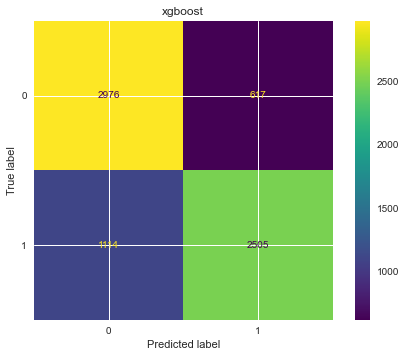

In [1295]:
disp = ConfusionMatrixDisplay(confusion_matrix=xgboost_cm2)  # creaing the confusion matrix plot.                           
disp.plot()  # displaying data in plot
plt.title("xgboost")  # adding a title to plot
plt.show()  # showing the plot

### Getting accurcy of the model

In [1296]:
xgboost_accuracy2 = round(accuracy_score(Y2_test, xgboost_Y2_pred)*100, 2) # storing accuray.
round(accuracy_score(Y2_test, xgboost_Y2_pred)*100, 2)  # showing the model accurecy rounded to 2 decimal places.

76.0

## k-Fold Cross Validation

In [ ]:
accuracies = cross_val_score(estimator = xgboost_classifier, X = X2, y = Y2, cv = 10)   # performs 10 different tests to get average accurecy.
print("List of Accuracy: {:.2f} %" accuracies*100)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))  # accuracy printed
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))  # standard deveation printed (std -avarage or std+ avarage )

In [1398]:
model_name = ["Logistic_regression_model", "k_nearest_neighbors","Support_vector_machines_rbf", \
              "naive_bayes_theorm","DecisionTree" ,"RandomForest", "xgboost"]
model_score_test_1 = [Logistic_accuracy, K_NN_accuracy, svm_accuracy, naive_bayes_accuracy, DecisionTree_accuracy, \
                      RandomForest_accuracy, xgboost_accuracy2]
model_score_test_2 = [Logistic_accuracy2, K_NN_accuracy2, svm_accuracy2, naive_bayes_accuracy2, DecisionTree_accuracy2,\
                      RandomForest_accuracy2, xgboost_accuracy2]

In [1399]:
model = pd.DataFrame({
    'model_name':model_name ,
    'score_test_1': model_score_test_1,
    'score_test_2':model_score_test_2
})
models.sort_values(by='score_test_1', ascending=False)

,model_name,score_test_1,score_test_2
1,k_nearest_neighbors,83.10,76.33
2,Support_vector_machines_rbf,83.10,67.11
4,DecisionTree,83.10,70.91
5,RandomForest,83.10,73.57
0,Logistic_regression_model,79.96,64.57
3,naive_bayes_theorm,78.20,71.09


In [1400]:
models.sort_values(by='score_test_2', ascending=False)

,model_name,score_test_1,score_test_2
1,k_nearest_neighbors,83.10,76.33
5,RandomForest,83.10,73.57
3,naive_bayes_theorm,78.20,71.09
4,DecisionTree,83.10,70.91
2,Support_vector_machines_rbf,83.10,67.11
0,Logistic_regression_model,79.96,64.57


In [959]:
# look it up as your about to finish this report.
# (Adeline, 2020) has a very creative idea to compare models at the end.
# you can make it even better by using visusals.ss